# `HELP INTERNATIONAL ASSIGNMENT `

In [1]:
# Important python libraries for data analysis and manipulation.

import pandas as pd
import numpy as np

# Libraries for visualization of data.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for suppressing of unwanted warninngs during execution of code.

import warnings
warnings.filterwarnings('ignore')

# Library required for Machine Learning

from sklearn.preprocessing import StandardScaler

# Library required for Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Library for clustering.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

# Reading Dataframe and Analysing it.

In [2]:
# Reading the CSV file " Country-data " and storing it in a variable "df" .

df=pd.read_csv("Country-data.csv")

# To have a brief look at what data we have.

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking the shape of our dataframe. 

df.shape

(167, 10)

**INFERENCE:**

**We have `167 rows` and `10 columns` in our dataframe.**

In [4]:
# Checking the data type of columns of our dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**INFERENCE:**

**We observe that we have `7 float type , 2 integer type and 1 object type columns ` in our dataframe. Also there is no need of any type conversion because we have numeric data which is best for clustering**

In [5]:
# Observing if we have any missing ( null ) values in our dataframe.

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**INFERENCE:**

**We `don't have any null values` . This means that there is no need for handling of missing values as there are none.**

# DATA CLEANING 

**Converting imports,exports and health from percentage values to actual values of their GDP per capita .Because these percentages don't give a clear picture of that country.**

In [6]:
# We'll multiply columns - "exports" , "health" , "imports " by "gdpp" so that we will get the total value and not the per 
# capita value. We will need whole data for analysis and not per capita . 

df['exports'] = (df['exports']*df['gdpp'])/100

df['health'] = (df['health']*df['gdpp'])/100

df['imports'] = (df['imports']*df['gdpp'])/100

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


**We don't have any useless columns . So there is no need of removing any column as of now. We may continue with Exploratory Data Analysis ( EDA ) now.**

# `Exploratory Data Analysis ( EDA )`

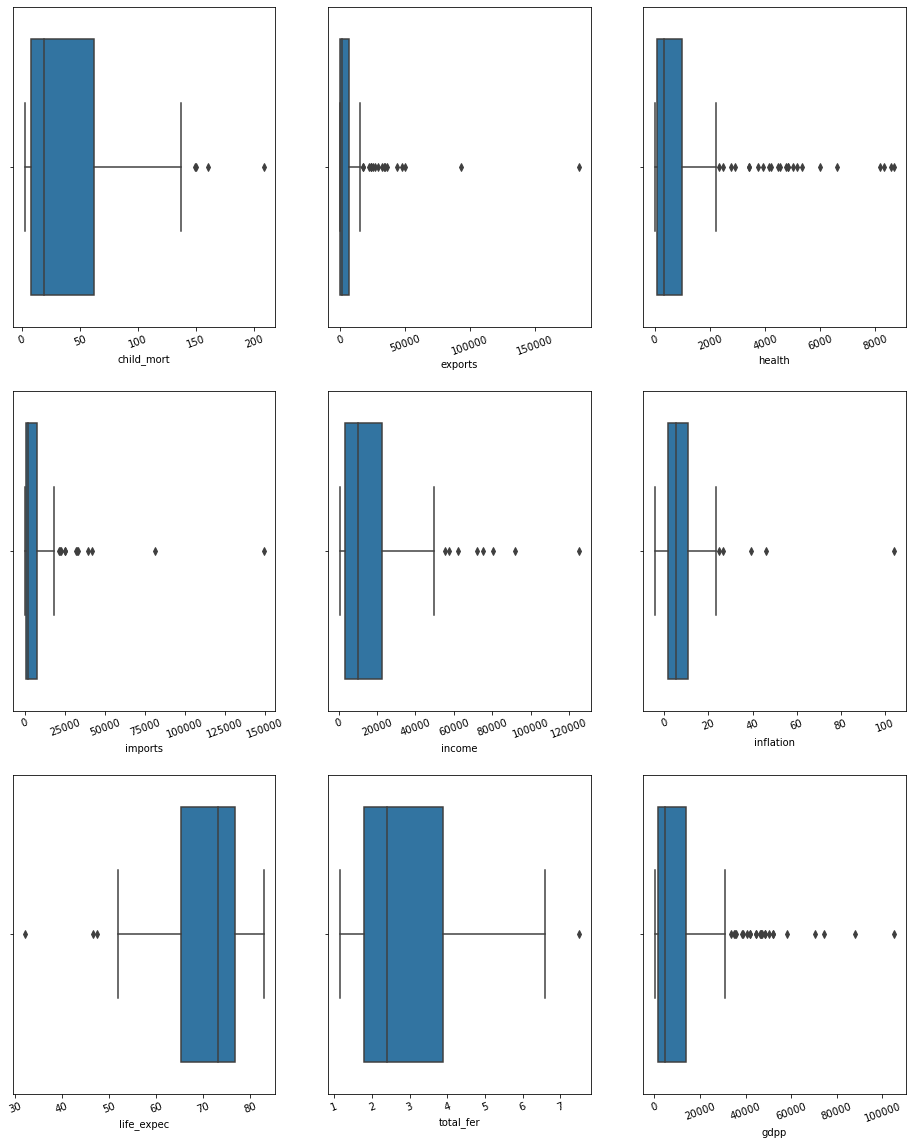

In [7]:
# Boxplots for all the numeric columns -'child_mort','exports','health','imports','income','inflation','life_expec',
# 'total_fer','gdpp' .

plt.figure(figsize=(16,20))
f = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(f): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)

**All the 9 columns have some outliers . We need to treat these outliers before clustering.**

In [8]:
# We perform both upper range and lower range outlier treatments.

def both_treated(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [9]:
df = both_treated(df, 'exports')
df = both_treated(df, 'health')
df = both_treated(df, 'imports')
df = both_treated(df, 'income')
df = both_treated(df, 'life_expec')
df = both_treated(df, 'gdpp')
df = both_treated(df, 'child_mort')
df = both_treated(df, 'inflation')
df = both_treated(df, 'total_fer')

In [10]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,18338.677500,51967.500000,24.160000,82.800000,7.007500,33130.000000


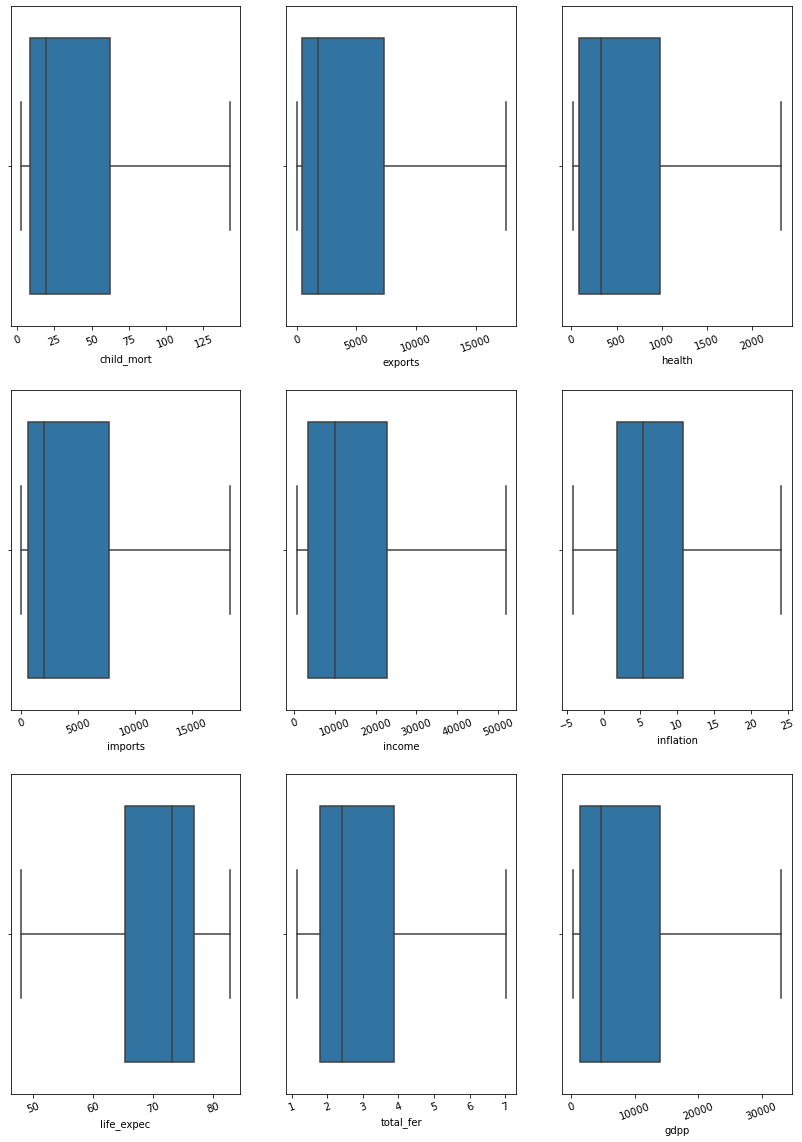

In [11]:
plt.figure(figsize=(14,20))
f = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(f): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)

**We have capped upper and lower range outliers .**

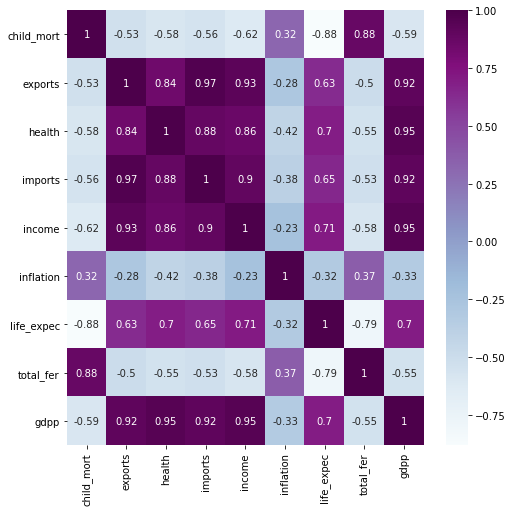

In [12]:
# Constructing a heatmap.

plt.figure(figsize = (8,8))  
sns.heatmap(df.corr(),annot = True,cmap="BuPu")
plt.show()

**-`child_mortality and life_expentency are highly-negatively correlated` with correlation of -0.88.**

**-`child_mortality and total_fertility are highly-positively correlated` with correlation of 0.88.**

**-`imports and exports are highly correlated` with correlation of 0.97.**

**`life_expentency and total_fertility are highly-negatively correlated` with correlation of -0.79.**

**There are many other corelations too like , `gdpp with exports, health, imports, income.`
  `Income with exports, health, imports, gdpp.`**

# `CLUSTERING`

 - `HOPKINS TEST`

In [13]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [14]:
hopkins(df.drop('country', axis = 1))

0.8787843132833818

**Given data is `good for clustering` because we have a `HOPKINS value > 0.85` .**

**The Hopkins statistic measures the cluster tendency of a data set. A value close to 1 indicates that the data is highly clustered and uniformly distributed data will tend to result in values close to 0. Hence our value 0.89, which is very close to 1 means that it is highly clustered which is good.**

# SCALING DATA

In [15]:
d_f =df.drop('country',axis=1)

In [16]:
standard_scaler = StandardScaler()
d_f = standard_scaler.fit_transform(d_f)

# KMeans Clustering

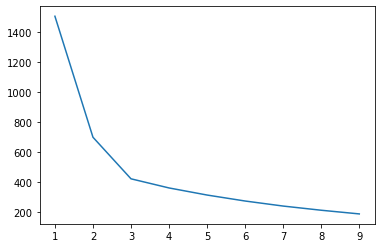

In [17]:
# We will use Elbow Curve to find optimal number of clusters.

ssd = []
for k in list(range(1,10)):             # run the loop for 10 times 
    
    model = KMeans(n_clusters = k, max_iter = 50).fit(d_f)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

**INFERENCE:**

**Looking at the above elbow curve it looks good to proceed with either 2 or 3 clusters.**

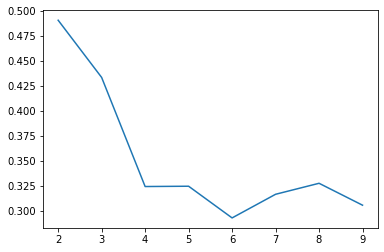

In [18]:
a = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(d_f)
    a.append([k, silhouette_score(d_f, kmeans.labels_)])
    
plt.plot(pd.DataFrame(a)[0], pd.DataFrame(a)[1]);

In [19]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
# Initialising Kmeans

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(d_f)
    
    cluster_labels = kmeans.labels_
    
# Silhouette Score

    silhouette_avg = silhouette_score(d_f, cluster_labels)
    print("For cluster number={0}, the silhouette score is : {1}".format(num_clusters, silhouette_avg))
    

For cluster number=2, the silhouette score is : 0.49089694803242895
For cluster number=3, the silhouette score is : 0.43360177139259876
For cluster number=4, the silhouette score is : 0.321039720465865
For cluster number=5, the silhouette score is : 0.33233047531593857
For cluster number=6, the silhouette score is : 0.3485701775033214
For cluster number=7, the silhouette score is : 0.32051156525933266
For cluster number=8, the silhouette score is : 0.32780127178447616


# Optimal number `K = 3`

**This is because at cluster number 3 we observe a drastic change in the Silhouette Score Values as observed in the above graph as well as values.**

In [20]:
# Initialising Kmeans

kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(d_f)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [21]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [22]:
df_km = pd.concat([df, pd.Series(kmeans.labels_)], axis = 1)
df_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [23]:
df_km['cluster_id'].value_counts()

2    78
1    48
0    41
Name: cluster_id, dtype: int64

**INFERENCE:**
    
**There seems to be good number of countries in all the 3 clusters.**

# `KMeans Cluster Visualisation`

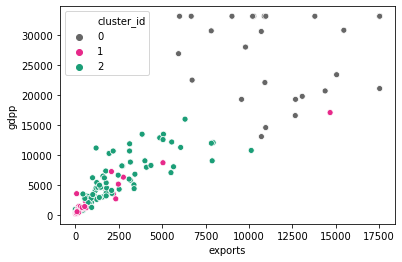

In [24]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster_id', legend = 'brief', data = df_km, palette='Dark2_r')
plt.show()

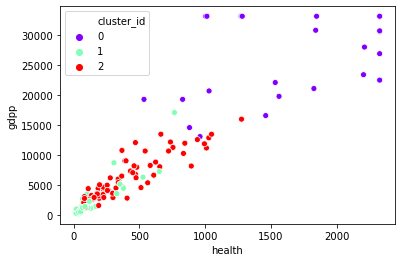

In [25]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='rainbow')
plt.show()

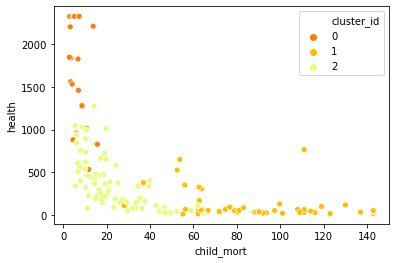

In [26]:
sns.scatterplot(x = 'child_mort', y = 'health', hue ='cluster_id', legend = 'full', data = df_km, palette='Wistia_r')
plt.show()

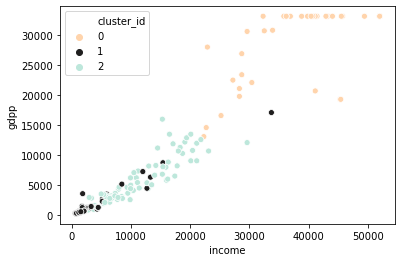

In [27]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='icefire_r')
plt.show()

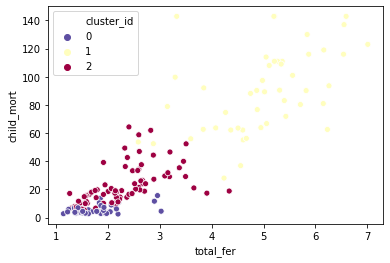

In [28]:
sns.scatterplot(x = 'total_fer', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Spectral_r')
plt.show()

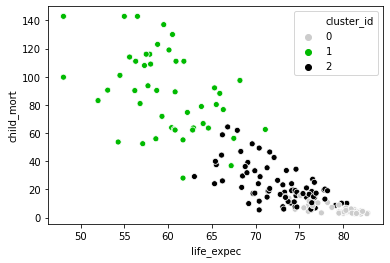

In [29]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='nipy_spectral_r')
plt.show()

**`Child_Mortality, Income, Gdpp` are some important factors which helps in deciding the development and progress of any country. Hence, we will proceed with analyzing these 3 variables to build clusters.**

# KMeans Cluster Profiling

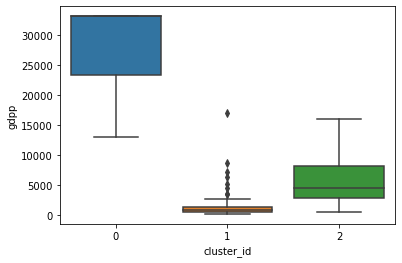

In [30]:
sns.boxplot(data=df_km,x = 'cluster_id',y='gdpp')
plt.show()

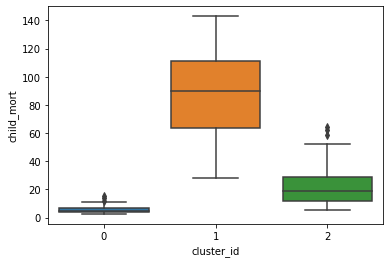

In [31]:
sns.boxplot(data=df_km,x = 'cluster_id',y='child_mort')
plt.show()

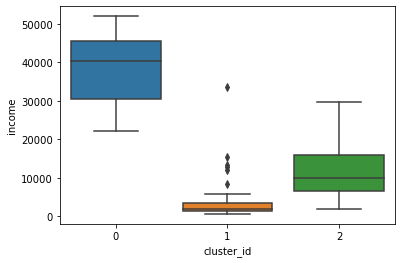

In [32]:
sns.boxplot(data=df_km,x = 'cluster_id',y='income')
plt.show()

**- `Income and Gdpp` are the factors which evaluates a country's financial well being. Any country with `lower Income and Gdpp values is in a need for aid`.**

**- Similarly, a `higher child mortality rate is problematic for any country`. Therefore we'll look after countries with higher child mortality rate and low income and gdpp.**

**- `Cluster ID 1 has very low income and gdpp but a very high child mortality rate`. This is the cluster that needs to be focused.**

In [33]:
# Finding the observations that belong to cluster ID : 1

df_km[df_km['cluster_id']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [34]:
# Cluster 1 has 48 countries in total . We will sort them in a way such that we begin with lower income , gdpp and a higher
# child mortality values, in an ascendin order. This is to get the top 10 countries which are in an urgent need.

top_kmeans = df_km[df_km['cluster_id']==1].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Sierra Leone,142.875,67.0320,52.2690,137.655,1220.0,17.200,55.00,5.2000,399.0,1
1,Central African Republic,142.875,52.6280,17.7508,118.190,888.0,2.010,48.05,5.2100,446.0,1
2,Haiti,142.875,101.2860,45.7442,428.314,1500.0,5.450,48.05,3.3300,662.0,1
3,Chad,142.875,330.0960,40.6341,390.195,1930.0,6.390,56.50,6.5900,897.0,1
4,Mali,137.000,161.4240,35.2584,248.508,1870.0,4.370,59.50,6.5500,708.0,1
5,Nigeria,130.000,589.4900,118.1310,405.420,5150.0,24.160,60.50,5.8400,2330.0,1
6,Niger,123.000,77.2560,17.9568,170.868,814.0,2.550,58.80,7.0075,348.0,1
7,Angola,119.000,2199.1900,100.6050,1514.370,5900.0,22.400,60.10,6.1600,3530.0,1
8,"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.800,57.50,6.5400,334.0,1
9,Burkina Faso,116.000,110.4000,38.7550,170.200,1430.0,6.810,57.90,5.8700,575.0,1


In [35]:
# Fetching only the top 10 countries and excluding the other 38 countries of cluster ID 1.

top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


# Top 10 countries obtained from K-Means Models are:
-	Sierra Leone
-   Central African Republic
-	Haiti
-	Chad
-	Mali
-	Nigeria
-	Niger
-	Angola
-	Congo, Dem. Rep.
-	Burkina Faso

# Heirarchial Clustering

**`Single Linkage`**

**In this clustering, the distance between two clusters is defined as the shortest distance between two points in the individual clusters.**

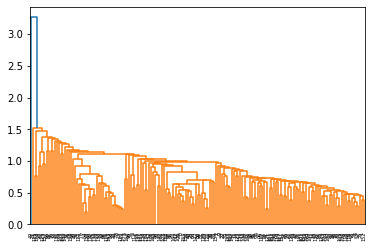

In [36]:
# Single Linkage Clustering

single = linkage(d_f, method="single", metric='euclidean')
dendrogram(single)
plt.show()

**Clusters are not being formed correctly in single linkage so we will not use this modelling. We go for complete linkage.**

**`Complete Linkage:`**

**In this clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.**

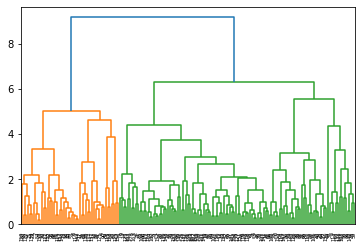

In [37]:
# Complete Linkage Clustering

complete = linkage(d_f, method="complete", metric='euclidean')
dendrogram(complete)
plt.show()

**Single linkage is not interpretable so let's go with complete linkage model.**

**Looking at dendrogram of hierarchical clustering there seems to be 3 clusters.**

In [39]:
cluster_labels = cut_tree(complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [40]:
df_hm = pd.concat([df, pd.Series(cluster_labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [41]:
df_hm['cluster_labels'].value_counts()

1    75
2    49
0    43
Name: cluster_labels, dtype: int64

**`INFERENCE :`**

**Earlier we had 41,48 and 78 countries in 0,1,2 cluster ID respectively. But, now we have 43 , 75 , 49 countries in 0,1,2 cluster Id respectively.**


# Hierarchical cluster visaulisation

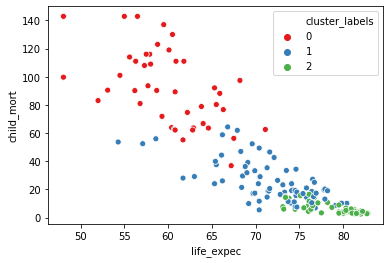

In [42]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

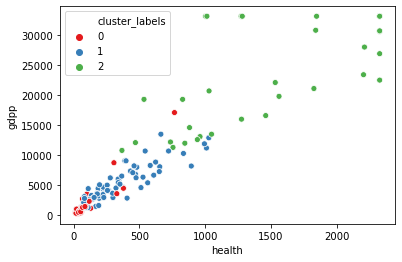

In [43]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

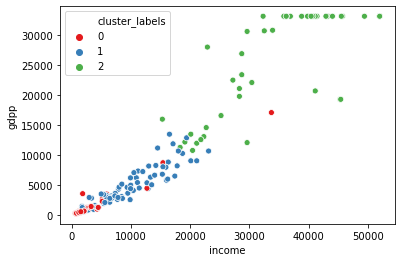

In [44]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

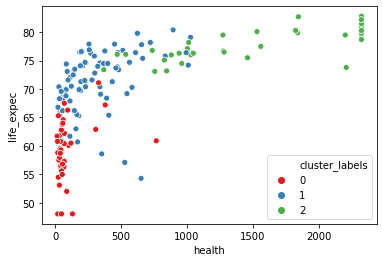

In [45]:
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

# Cluster Profiling

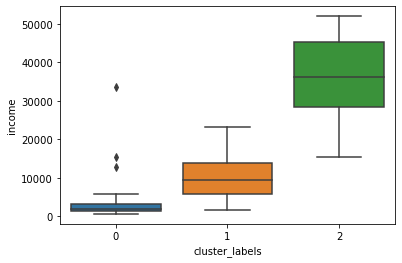

In [46]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='income')
plt.show()

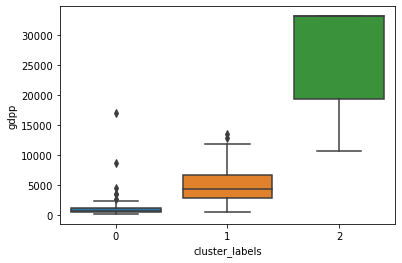

In [47]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='gdpp')
plt.show()

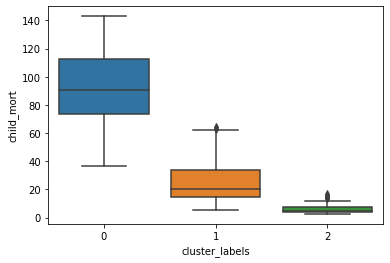

In [48]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='child_mort')
plt.show()

**`INFERENCE:`**

**`Cluster 0 has a very low income , low gdpp and a very high high child_mort rate`. This cluster is our focus here**

# Finding the observations that belongs to cluster 0:

In [49]:
df_hm[df_hm['cluster_labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113     

In [52]:
df_hm[df_hm['cluster_labels']==0]['country'].value_counts().sum()

43

**We have 43 countries in cluster ID 0 but our primary focus right now is on the top 10 countries so we will filter on the basis that we have countries with lower income and gdpp with higher child mortality in an increasing order.**

In [50]:
# Arranging countries in ascening order

top_h = df_hm[df_hm['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,0
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662.0,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897.0,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330.0,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530.0,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575.0,0


In [53]:
# Fetching only the top 10 countries.

top_10 = top_h.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


# Top 10 Countries obtained from Hierarchical Models are:
-	Sierra Leone
-	Central African Republic
-	Haiti
-	Chad
-	Mali
-	Nigeria
-	Niger
-	Angola
-	Congo,Dem.Rep.
-	Burkina Faso

**-We have succesfully done clustering of countries.**

**-We identified few factors like `child mortality, income and gdpp` which plays a vital role in deciding the development status of any country.**

**-Then we used these three factors to build clusters from which we identified those countries which are in an urgent need of aid .**



# These 10 countries are those which have the `highest child mortality rates alongwith least values for income and GDP` . As a result of these 3 factors , `life expectancy is least in these 10 countries`. NGO shall focus on these urgently.